# **Portugal bank marketing**

---


***To predict whether a client has subscribed a term deposit or not.***

## **Reading the dataset**
All the required libraries are imported

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('bank.csv',sep=";")
# After reading the dataset, let’s check its top 5 rows using head() method to just see how the data looks.
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
# Checking the shape of the dataset
df.shape

(41188, 21)

In [ ]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [ ]:
df.describe() # get statistics value in each columns

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


###  **Q.1 Basic Primary Analysis**

---



In [ ]:
sns.set_style("darkgrid")
plt.figure(figsize=(7,7))

<Figure size 504x504 with 0 Axes>

<Figure size 504x504 with 0 Axes>

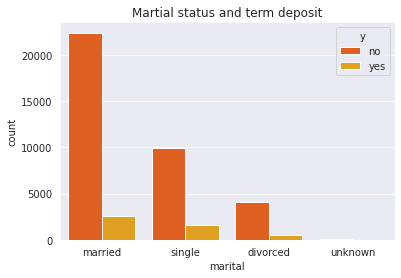

In [ ]:
plt.title('Martial status and term deposit')
plt.ylabel('Number of clients')
sns.countplot(x="marital",data=df,hue='y',palette='autumn')
plt.show()

***In terms martial status whether it be married,single or divorced clients has not subscribed to term deposits.***

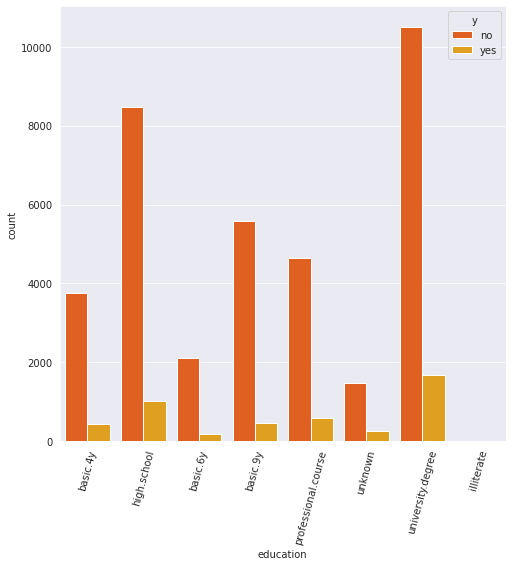

In [ ]:
plt.figure(figsize=(8,8))
plt.xticks(rotation=75)

sns.countplot(x="education",data=df,hue='y',palette='autumn')
plt.show()

***In terms of  education, University degree clients has the most subscription to the term deposit than other education qualifications***

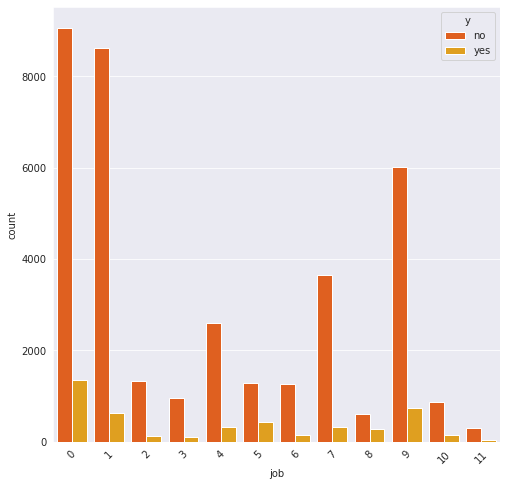

In [ ]:
plt.figure(figsize=(8,8))
plt.xticks(rotation=45)
plt.ylabel('No. of Clients')
sns.countplot(x="job",data=df,hue='y',palette='autumn')
plt.show()

###  **Q.2 Basic Exploratory Analysis**

---
**a. Missing value Analysis**


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

*From the above output, it is evident that there are no missing values in the given dataset.*

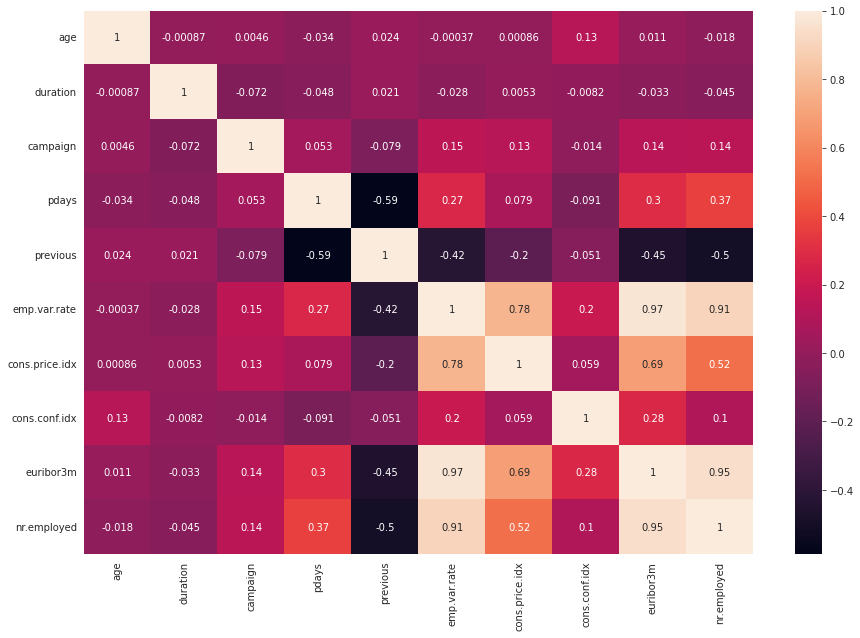

In [ ]:
f, ax = plt.subplots(figsize=(15,10 ))
sns.heatmap(df.corr(),annot=True)

 **b.Performing Label Encoding as most of the values are in object data type**

---



In [ ]:
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()
df['job']= label_encoder.fit_transform(df['job'])

In [ ]:
df['marital']= label_encoder.fit_transform(df['marital'])

In [ ]:
df['education']= label_encoder.fit_transform(df['education'])


In [ ]:
df['default']= label_encoder.fit_transform(df['default'])
df['housing']= label_encoder.fit_transform(df['housing'])
df['loan']= label_encoder.fit_transform(df['loan'])
df['contact']= label_encoder.fit_transform(df['contact'])
df['month']= label_encoder.fit_transform(df['month'])
df['day_of_week']= label_encoder.fit_transform(df['day_of_week'])
df['poutcome']= label_encoder.fit_transform(df['poutcome'])

In [ ]:
df.dtypes

age                 int64
job                 int64
marital             int64
education           int64
default             int64
housing             int64
loan                int64
contact             int64
month               int64
day_of_week         int64
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome            int64
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [ ]:
df.corr()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,0.001250,-0.389753,-0.117892,0.164965,-0.001603,-0.007368,0.007021,-0.024877,-0.017572,-0.000866,0.004594,-0.034369,0.024365,0.019750,-0.000371,0.000857,0.129372,0.010767,-0.017725
job,0.001250,1.000000,0.027897,0.134121,-0.028277,0.006962,-0.010209,-0.025132,-0.033213,-0.000844,-0.006490,-0.006923,-0.028468,0.020965,0.011504,-0.008271,-0.016017,0.052760,-0.007880,-0.019574
marital,-0.389753,0.027897,1.000000,0.109220,-0.079450,0.010467,0.005788,-0.054501,-0.007629,0.002202,0.010290,-0.007240,-0.037942,0.038689,0.001912,-0.084210,-0.057477,-0.033783,-0.091939,-0.086199
education,-0.117892,0.134121,0.109220,1.000000,-0.186859,0.016825,0.006384,-0.105726,-0.082684,-0.017986,-0.015102,0.000371,-0.046626,0.038831,0.017009,-0.043778,-0.081607,0.078799,-0.036380,-0.041492
default,0.164965,-0.028277,-0.079450,-0.186859,1.000000,-0.015815,-0.003782,0.135238,-0.015830,-0.008701,-0.011794,0.032825,0.080062,-0.102416,0.023417,0.203263,0.168073,0.026522,0.195336,0.189845
housing,-0.001603,0.006962,0.010467,0.016825,-0.015815,1.000000,0.044296,-0.082186,-0.018141,0.003339,-0.007658,-0.011010,-0.010551,0.021314,-0.011783,-0.060196,-0.080504,-0.033845,-0.059277,-0.045862
loan,-0.007368,-0.010209,0.005788,0.006384,-0.003782,0.044296,1.000000,-0.008556,-0.005705,-0.009344,-0.000916,0.005166,0.000345,-0.001327,-0.001511,0.001849,-0.002430,-0.012025,0.000125,0.003903
contact,0.007021,-0.025132,-0.054501,-0.105726,0.135238,-0.082186,-0.008556,1.000000,0.276565,-0.009575,-0.026657,0.077368,0.117970,-0.212848,0.118744,0.393584,0.591474,0.251614,0.399773,0.269155
month,-0.024877,-0.033213,-0.007629,-0.082684,-0.015830,-0.018141,-0.005705,0.276565,1.000000,0.027677,0.003690,-0.062059,-0.047891,0.103157,-0.065012,-0.178782,-0.004239,0.009652,-0.117264,-0.221425
day_of_week,-0.017572,-0.000844,0.002202,-0.017986,-0.008701,0.003339,-0.009344,-0.009575,0.027677,1.000000,0.021950,-0.038288,-0.009531,-0.004102,0.018732,0.033245,0.005644,0.041465,0.039043,0.028380


**c. Feature selection using Random Forest**

---



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


In [ ]:
X = df.drop(['y'], axis=1)

y = df['y']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)


In [ ]:
clf = RandomForestClassifier(n_estimators=100, random_state=0)
# fit the model to the training set
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [ ]:
# view the feature scores
feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_scores


duration          0.313343
euribor3m         0.124483
age               0.091003
nr.employed       0.065146
job               0.049226
education         0.044285
campaign          0.042218
day_of_week       0.040921
pdays             0.032225
marital           0.025055
poutcome          0.024655
cons.conf.idx     0.024505
cons.price.idx    0.022592
housing           0.020324
month             0.019143
emp.var.rate      0.015127
loan              0.015051
previous          0.012656
contact           0.009585
default           0.008458
dtype: float64

**The most important feature is duration  and least important feature is default**

In [ ]:
# Displaying top most important features of the dataset
feature_scores.head(5)


duration       0.313343
euribor3m      0.124483
age            0.091003
nr.employed    0.065146
job            0.049226
dtype: float64

**d. Handling unbalanced data using SMOTE**

---



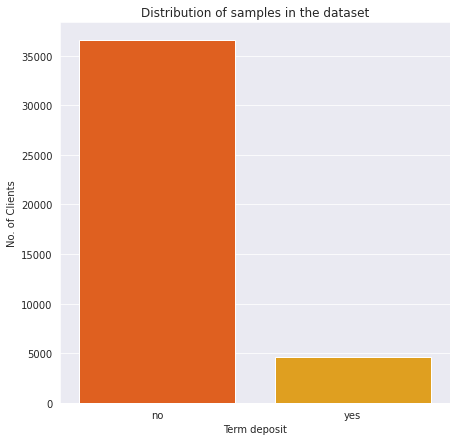

In [ ]:
plt.figure(figsize=(7,7))
#checking for the distribution of samples in the dataset
plt.title('Distribution of samples in the dataset')
sns.countplot(x='y',data=df,palette='autumn')
plt.xlabel('Term deposit')
plt.ylabel('No. of Clients')
plt.show()

**From the above plot, it is evident that the dataset is highly imbalanced as  there are unequal distribution of classes within a dataset.**

In [ ]:
pip install imblearn

In [ ]:
import collections

In [ ]:
X_train.shape

(28831, 20)

In [ ]:
from imblearn.over_sampling import SMOTE
counter=collections.Counter(y_train)
print('Before Sampling',counter)
smt=SMOTE()
X_train_smote,y_train_smote=smt.fit_resample(X_train,y_train)
counter=collections.Counter(y_train_smote)
print('After Sampling',counter)

Before Sampling Counter({'no': 25579, 'yes': 3252})
After Sampling Counter({'no': 25579, 'yes': 25579})


**e. Feature Scaling**

---



In [ ]:
from sklearn.preprocessing import StandardScaler
st_x= StandardScaler()    
x_train_smote= st_x.fit_transform(X_train_smote)    
x_test= st_x.transform(X_test)

##**Q.3 Building the model**

---


In this we will build several classification model on the same dataset and finally we will find which model yields the best score.

1. Logistic Regression
2. AdaBoost
3. Naive Bayes
4. KNN
5. SVM

**1. Logistic Regression**



In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
Logistic_model=LogisticRegression()
Logistic_model.fit(x_train_smote,y_train_smote)

LogisticRegression()

In [ ]:
Logistic_model.score(x_train_smote, y_train_smote)

0.883048594550217

In [ ]:
predict_test = Logistic_model.predict(x_test)

In [ ]:
accuracy_test = accuracy_score(y_test,predict_test)

print('accuracy score on test dataset : ', accuracy_test)

accuracy score on test dataset :  0.8689811442906854


**Performance Metrics**

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predict_test))

              precision    recall  f1-score   support

          no       0.97      0.88      0.92     10969
         yes       0.45      0.79      0.58      1388

    accuracy                           0.87     12357
   macro avg       0.71      0.84      0.75     12357
weighted avg       0.91      0.87      0.88     12357



**Confusion Matrix**


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,predict_test)

array([[9637, 1332],
       [ 287, 1101]])

TruePostive = 9637

TrueNegative = 1101

FalsePositive = 287

FalseNegative = 1332

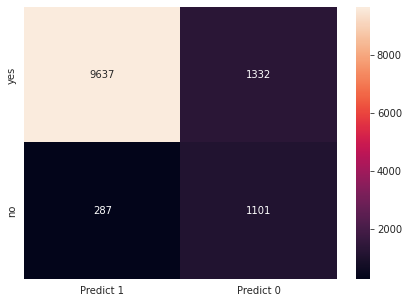

In [ ]:
from sklearn import metrics
cm=metrics.confusion_matrix(y_test,predict_test)

df_cm = pd.DataFrame(cm, index = [i for i in ["yes","no"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm,annot=True,fmt='g')

**2. AdaBoost**


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier(n_estimators=150, learning_rate=1, random_state=0)

# Train Adaboost Classifer
adaboost_model = ada.fit(x_train_smote, y_train_smote)

y_pred = adaboost_model.predict(x_test)


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_test_ada = accuracy_score(y_test,predict_test)
print("AdaBoost Classifier Model Accuracy:", accuracy_score(y_test, y_pred))

AdaBoost Classifier Model Accuracy: 0.8880796309783928


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          no       0.94      0.97      0.95     10969
         yes       0.68      0.50      0.58      1388

    accuracy                           0.92     12357
   macro avg       0.81      0.74      0.77     12357
weighted avg       0.91      0.92      0.91     12357



In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[10640,   329],
       [  693,   695]])

TruePostive = 10640

TrueNegative =695

FalsePositive = 693

FalseNegative = 329

**3. Naive Bayes Classifier**

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()

# fit the model with the training data
nb_model.fit(x_train_smote,y_train_smote)



GaussianNB()

In [ ]:
predict_test = nb_model.predict(x_test)


In [ ]:
accuracy_test_nb = accuracy_score(y_test,predict_test)

print('accuracy score on test dataset : ', accuracy_test_nb)

accuracy score on test dataset :  0.7789916646435219


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test,predict_test ))

              precision    recall  f1-score   support

          no       0.97      0.88      0.92     10969
         yes       0.45      0.79      0.58      1388

    accuracy                           0.87     12357
   macro avg       0.71      0.84      0.75     12357
weighted avg       0.91      0.87      0.88     12357



**4. KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=45,metric='euclidean' )

In [ ]:
knn_model.fit(x_train_smote, y_train_smote)

KNeighborsClassifier(metric='euclidean', n_neighbors=45)

In [ ]:
knn_model.score(x_train_smote, y_train_smote)

0.901716251612651

In [ ]:
knn_model.score(x_test, y_test)

0.8654204094845027

In [ ]:
y_pred_knn=clf.predict(x_test)
accuracy_test_knn = accuracy_score(y_test,predict_test)
accuracy_score(y_test,y_pred_knn)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


0.8880796309783928

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

          no       0.89      1.00      0.94     10969
         yes       0.59      0.01      0.02      1388

    accuracy                           0.89     12357
   macro avg       0.74      0.51      0.48     12357
weighted avg       0.85      0.89      0.84     12357



**5. SVM**

In [ ]:
from sklearn import svm

In [ ]:
svc_model=svm.SVC()

In [ ]:
svc_model.fit(x_train_smote,y_train_smote)


SVC()

In [ ]:
y_pred=clf.predict(x_test)

accuracy_score(y_test,y_pred)


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


0.8880796309783928

In [ ]:
accuracy_test_svc = accuracy_score(y_test,y_pred)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          no       0.89      1.00      0.94     10969
         yes       0.59      0.01      0.02      1388

    accuracy                           0.89     12357
   macro avg       0.74      0.51      0.48     12357
weighted avg       0.85      0.89      0.84     12357



##**Q.4 Inference from the model**

---



In [ ]:
d=[['Logistic Regression',accuracy_test],['AdaBoost',
accuracy_test_ada],['Naive bayes',accuracy_test_nb],['KNN',accuracy_test_knn],['SVM',accuracy_test_svc]]
df1 = pd.DataFrame(d, columns = ['Model','Test_Accuracy'])
print(df1)

                 Model  Test_Accuracy
0  Logistic Regression       0.868981
1             AdaBoost       0.778992
2          Naive bayes       0.778992
3                  KNN       0.778992
4                  SVM       0.888080


From the above Accuracy report, ***SVM classifier*** has the highest accuracy than other models.

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[10957,    12],
       [ 1371,    17]])

***The TruePostive rate for this SVM Classifier is 10957 and the true negative rate is also low when compared to other models***

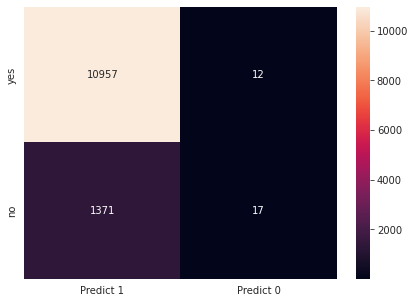

In [ ]:
from sklearn import metrics
cm=metrics.confusion_matrix(y_test,y_pred)

df_cm = pd.DataFrame(cm, index = [i for i in ["yes","no"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm,annot=True,fmt='g')